<a href="https://colab.research.google.com/github/jordimas/ml-study/blob/main/Car_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

#Download data
!wget https://gent.softcatala.org/jmas/files/car-prices-from-kaggle.zip
!unzip car-prices-from-kaggle.zip

--2022-01-08 14:17:17--  https://gent.softcatala.org/jmas/files/car-prices-from-kaggle.zip
Resolving gent.softcatala.org (gent.softcatala.org)... 193.144.12.15
Connecting to gent.softcatala.org (gent.softcatala.org)|193.144.12.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275237598 (262M) [application/zip]
Saving to: ‘car-prices-from-kaggle.zip’

car-prices-from-kag 100%[===================>] 262.49M  23.0MB/s    in 12s     

2022-01-08 14:17:30 (21.0 MB/s) - ‘car-prices-from-kaggle.zip’ saved [275237598/275237598]

Archive:  car-prices-from-kaggle.zip
  inflating: vehicles.csv            


In [4]:
import pandas as pd

df_org = pd.read_csv('vehicles.csv')


In [5]:
# Analysis
df_org.head(30)

# Data exploration
df = df_org
print (df.head())
print(df.dtypes)
print (df.info)
pd.options.display.float_format = '{:.2f}'.format
df.describe()

# Unique values in a column
df.model.unique()


           id  ... posting_date
0  7222695916  ...          NaN
1  7218891961  ...          NaN
2  7221797935  ...          NaN
3  7222270760  ...          NaN
4  7210384030  ...          NaN

[5 rows x 26 columns]
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object
<bound method DataFrame.info of                 id  ...              posting_date
0       7222695916  ...                       NaN
1       7218891

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

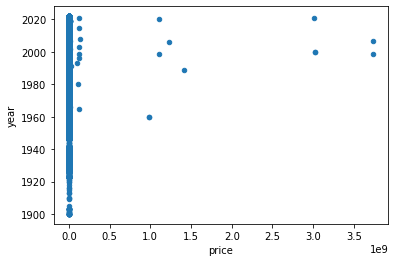

In [6]:
import matplotlib.pyplot as plt
df.plot(x="price", y="year",  kind="scatter")
plt.show()

In [7]:

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from matplotlib import pyplot as plt
import sklearn.neighbors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor


df = df_org.copy()

# Only 30.000 elements
df = df.head(30000)

# Drop all rows with all elements with NA
df = df.dropna(axis=1, how='all')

df = df.dropna(axis=0)
print("--")
print(df.head())


#model = linear_model.LinearRegression()
model = RandomForestRegressor()

df = df.fillna(df.mean())

y = df['price']
x = df[['year' ,'odometer']]

features_to_encode = ['manufacturer',  'state', 'type']

for feature in features_to_encode:
  res = pd.get_dummies(frame[feature],prefix='fe',drop_first=True)
  x = pd.concat([x,res],axis=1)

print(x.head(5))
print(y.head(5))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

model.fit(X_train, y_train)



--
             id  ...              posting_date
126  7305672709  ...  2021-04-12T11:20:35-0500
127  7305672266  ...  2021-04-12T11:20:00-0500
128  7305672252  ...  2021-04-12T11:19:58-0500
215  7316482063  ...  2021-05-03T17:48:17-0500
219  7316429417  ...  2021-05-03T16:03:27-0500

[5 rows x 25 columns]
       year  odometer  fe_audi  fe_bmw  ...  fe_sedan  fe_truck  fe_van  fe_wagon
126 2018.00  68472.00        0       0  ...         0         0       1         0
127 2019.00  69125.00        0       0  ...         0         0       1         0
128 2018.00  66555.00        0       0  ...         0         0       1         0
215 2002.00 155000.00        0       0  ...         1         0       0         0
219 1995.00 110661.00        0       1  ...         1         0       0         0

[5 rows x 54 columns]
126       0
127       0
128       0
215    4000
219    2500
Name: price, dtype: int64


RandomForestRegressor()

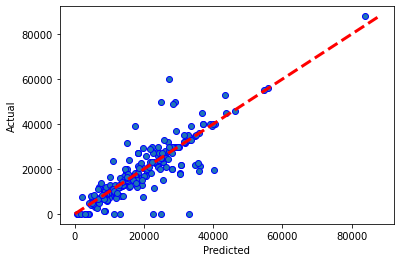

The model performance for testing set
--------------------------------------
MAE is 3870.582212425595
MSE is 45864521.4080614
R2 score is 0.7291988512641397


In [ ]:
from sklearn import metrics
import seaborn as sns

# Model evalution
y_predicted = model.predict(X_test)

#draw

fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

sns.pairplot(data = x, diag_kind = 'kde')